In [1]:
import torch 
torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo

repo = "isl-org/ZoeDepth"
model = torch.hub.load(repo, "ZoeD_NK", pretrained=True)

/root/miniconda3/envs/detrex/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/root/miniconda3/envs/detrex/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


In [ ]:
model = model.cuda(0)


In [8]:
from PIL import Image
DEVICE="cuda:0"
image = Image.open("datasets/coco/test2017/000000000001.jpg").convert("RGB")  # load

# Tensor 
from zoedepth.utils.misc import pil_to_batched_tensor
X = pil_to_batched_tensor(image).to(DEVICE)
depth_tensor = model.infer(X)

In [10]:
dmap = depth_tensor[0][0]

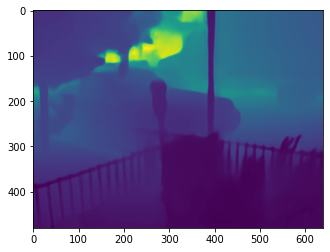

In [12]:
import matplotlib.pyplot as plt 
plt.imshow(dmap.detach().cpu().numpy())

In [13]:
dmap.max(), dmap.min()

(tensor(39.4102, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(4.4221, device='cuda:0', grad_fn=<MinBackward1>))

In [15]:
from zoedepth.utils.misc import save_raw_16bit
from zoedepth.utils.misc import colorize

dmap = colorize(dmap)

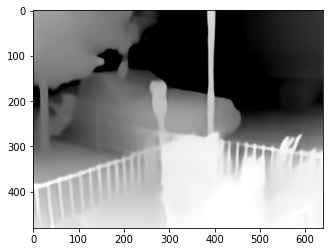

In [16]:
plt.imshow(dmap)

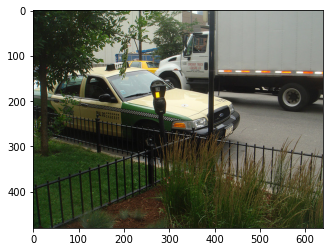

In [20]:
plt.imshow(image)